# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load data](#4.4_Load_Data)
  * [4.5 Set the index](#4.5_set_the_index)
  * [4.6 Reorder the columns](#4.6_reorder_the_columns)
  * [4.7 Impute the missing feature (predictor) values](#4.7_impute_the_missing_values)
  * [4.8 Select the 100 most useful features](#4.8_select_100_best)
  * [4.9 Filter the data to include only the best features](#4.9_filter_the_data)
  * [4.10 Define X and y](#4.10_define_x_and_y)
  * [4.11 Train/test split](#4.11_train_test_split)
  * [4.12 Random forest model](#4.12_random_forest_model)
       * [4.12.1 First model](#4.12.1_first_model)
       * [4.12.2 Define the pipeline](#4.12.2_define_the_pipeline)
       * [4.12.3 Fit and assess performance using cross-validation](#4.12.3_fit_and_assess_performance_using_cross-validation)
       * [4.12.4 Hyperparameter search using GridSearchCV](#4.12.4_hyperparameter_search_using_GridSearchCV)       
 * [4.13 k-NN model](#4.13_knn_model)
       * [4.13.1 First model](#4.13.1_first_model)
       * [4.13.2 Hyperparameter search using GridSearchCV](#4.13.2_hyperparameter_search_using_GridSearchCV)     
  * [4.14 Final model selection](#4.14_final_model_selection)
    * [4.14.1 Random forest classification model performance](#4.14.1_random_forest_model_performance)
    * [4.14.2 k-NN model performance](#4.14.2_knn_model_performance)
    * [4.14.3 Conclusion](#4.14.3_conclusion)
  * [4.15 Save best model object from pipeline](#4.15_save_best_model_object_from_pipeline)



## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, we transformed data from one "raw" data form into another format in order to to make it more appropriate and valuable for our analysis. In this step we will do the followings:

  * Impute the missing values
  * Select the most useful 100 features. 
  * Filter the data based on the selected features
  * Split the data
  * Try out two machine learning models:
      * Random Forest Classifier
      * KNN
  * Compare the performance of the models
  

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error, mean_absolute_error, precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.ensemble import ExtraTreesClassifier

from ipynb.fs.full.auxiliary_functions import save_file

%matplotlib inline


## 4.4 Load data<a id='4.4_Load_Data'></a>

In [2]:
df_final = pd.read_csv('df_final.csv')
df_final.head()

,member_id,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,num_of_visit,v1,v1_re_adm,v1_er_to_inp,v1_days_to_prev,...,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill,num_of_drugs,num_of_tests
0,nr+43zfHQPKSwx2IJuJI5Q==,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,311.0
1,Vwf7mI0tTGC4amYJPD6uJg==,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,132.0
2,TRudRczSQt6dwb6EeZ1RLA==,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,115.0
3,VjG87+cBSB2B1+loMmoHCg==,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,283.0
4,7CfP6Hq5Qy6J0rXIuTc7kw==,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN


In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Columns: 30057 entries, member_id to num_of_tests
dtypes: float64(30056), object(1)
memory usage: 445.1+ MB


## 4.5 Set the index <a id='4.5_set_the_index'></a>

In the following we set 'member_id' as index.

In [4]:
df_final.set_index('member_id', inplace=True)
df_final.head()

,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,num_of_visit,v1,v1_re_adm,v1_er_to_inp,v1_days_to_prev,v1_len,...,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill,num_of_drugs,num_of_tests
member_id,,,,,,,,,,,,,,,,,,,,,
nr+43zfHQPKSwx2IJuJI5Q==,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,311.0
Vwf7mI0tTGC4amYJPD6uJg==,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,132.0
TRudRczSQt6dwb6EeZ1RLA==,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,115.0
VjG87+cBSB2B1+loMmoHCg==,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,283.0
7CfP6Hq5Qy6J0rXIuTc7kw==,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN


## 4.6 Reorder the columns<a id='4.6_reorder_the_columns'></a>

In order to define X, independent variable and y, dependent variable (target feature), we change the order of the columns.

In [5]:
col=list(df_final.columns)
ordered_col=['icd_I10', 'icd_I739', 'icd_I10_chronic', 'icd_I739_chronic']+col[4:]
# reorder the columns of df_final

df_final=df_final[ordered_col]
df_final.head()

,icd_I10,icd_I739,icd_I10_chronic,icd_I739_chronic,num_of_visit,v1,v1_re_adm,v1_er_to_inp,v1_days_to_prev,v1_len,...,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill,num_of_drugs,num_of_tests
member_id,,,,,,,,,,,,,,,,,,,,,
nr+43zfHQPKSwx2IJuJI5Q==,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,311.0
Vwf7mI0tTGC4amYJPD6uJg==,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,132.0
TRudRczSQt6dwb6EeZ1RLA==,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,115.0
VjG87+cBSB2B1+loMmoHCg==,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,283.0
7CfP6Hq5Qy6J0rXIuTc7kw==,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN


We change the dtypes of columns 'icd_I10' and 'icd_I739' into 'int'.

In [6]:
df_final['icd_I10']=df_final['icd_I10'].astype('int')
df_final['icd_I739']=df_final['icd_I739'].astype('int')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, nr+43zfHQPKSwx2IJuJI5Q== to ZtdvAJtHT/uuwJWbulElSA==
Columns: 30056 entries, icd_I10 to num_of_tests
dtypes: float64(30054), int64(2)
memory usage: 445.1+ MB


## 4.7 Impute the missing feature (predictor) values <a id=4.7_impute_the_missing_values ><a/>

We have some 'inf' and '-inf' values in our dataframe. We will replace these values with np.nan. Also, we replace all nulls with 0 to make sure that our algorithms will work. 

In [7]:
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.fillna(0, inplace=True)

We apply 'abs()' to make sure that we don't have negative values.

In [8]:
df_final=df_final[df_final.columns].abs()

We define X and y.

In [9]:
X=df_final.iloc[:, 3:]
y=df_final.iloc[:, 0:2]
print(X.shape, y.shape)

(1941, 30053) (1941, 2)


## 4.8 Select the 100 most useful features <a id=4.8_select_100_best><a/>

We use 'SelectKBest()' function to determine the best 100 features among 30054 features.

In [10]:
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','scores']  #naming the dataframe columns
featureScores.nlargest(100,'scores').head(30) #print 100 best features

,features,scores
19,v2_days_to_prev,2305.372136
5,v1_days_to_prev,1561.350298
33,v3_days_to_prev,1339.846479
0,icd_I739_chronic,1133.172308
47,v4_days_to_prev,658.510282
159,v12_days_to_prev,476.908073
30052,num_of_tests,417.215788
30051,num_of_drugs,416.337624
131,v10_days_to_prev,246.103004
145,v11_days_to_prev,204.106950


In [11]:
# save the data to a new csv file
datapath = '../Outputs'
save_file(featureScores.nlargest(100, 'scores'), 'feature_scores_100_largest.csv', datapath)

Directory ../Outputs was created.
Writing file.  "../Outputs/feature_scores_100_largest.csv"


The 100 most useful features can be summarized in the following manner:
 * Created from 'days_to_prev_admission' which is one of the column of the admissions data.
 * Duration of the hospital visits.
 * Drug quantity rate. 
 * Total number of hospital visits. 
 * Total number of lab tests administered.  
 * Total number of medicines prescribed. 

## 4.9 Filter the data to include only the best features <a id=4.9_filter_the_data ><a/>

We filter our dataframe to include only the best 100 features.

In [12]:
df=df_final[['icd_I10', 'icd_I739']+list(featureScores.nlargest(100, 'scores')['features'])]
df.head()

,icd_I10,icd_I739,v2_days_to_prev,v1_days_to_prev,v3_days_to_prev,icd_I739_chronic,v4_days_to_prev,v12_days_to_prev,num_of_tests,num_of_drugs,...,ndc#_17478071511_rate,ndc#_53885020801_rate,ndc#_70461041910_rate,ndc#_59676036001_rate,ndc#_60505279500_rate,ndc#_781620693_rate,ndc#_53885004601_rate,ndc#_23114501_rate,ndc#_169413212_rate,v15_len
member_id,,,,,,,,,,,,,,,,,,,,,
nr+43zfHQPKSwx2IJuJI5Q==,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,311.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vwf7mI0tTGC4amYJPD6uJg==,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,132.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRudRczSQt6dwb6EeZ1RLA==,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,115.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VjG87+cBSB2B1+loMmoHCg==,0.0,1.0,267.0,0.0,0.0,1.0,0.0,0.0,283.0,202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7CfP6Hq5Qy6J0rXIuTc7kw==,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.10 Define X and y <a id=4.10_define_x_and_y><a/>

In [13]:
X=df.iloc[:, 2:]
y=df.iloc[:, 0:2]

## 4.11 Train/test split<a id='4.11_train_test_split'></a>

We split the data 30% to 70%. We use 30% for testing and 70% for training. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## 4.12 Random forest model<a id='4.12_random_forest_model'></a>

## 4.12.1 First model <a id=4.12.1_first_model><a/>    

We will try the random forest model first. For classification, this is provided by `sklearn`'s `RandomForestClassifier` class. We will set the hyperparameter 'n_estimators' to 10 which is the square root of the number of features included in the data. Later on we will pick different values for 'n_estimators' and compare the performance of the models.

In [15]:
X=df.iloc[:, 2:]
y=df.iloc[:, 0:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24) # 70% training and 30% testing
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)


Below, we check the performance of our model for the training set.

In [16]:
print("Accuracy_train:",metrics.accuracy_score(y_train, y_pred_train))
print('-----------------------------------------------------------')
# Model Accuracy, how often is the classifier correct?
print(classification_report(y_train, y_pred_train, target_names=["I10", "I739"]))


Accuracy_train: 0.9941089837997055
-----------------------------------------------------------
              precision    recall  f1-score   support

         I10       1.00      0.99      1.00       844
        I739       1.00      1.00      1.00       535

   micro avg       1.00      0.99      1.00      1379
   macro avg       1.00      0.99      1.00      1379
weighted avg       1.00      0.99      1.00      1379
 samples avg       1.00      1.00      1.00      1379



From the classification report, it can be seen that the model has an average performance of around 99% ranging from precision, recall, f1-score, and support.

In [17]:
print('ROC AUC:', roc_auc_score(y_train, y_pred_train))

ROC AUC: 0.9969728692417769


Next, we check the performance of our model for the training set.

In [18]:
print("Accuracy_test:",metrics.accuracy_score(y_test, y_pred_test))
print('---------------------------------------------------------')
print(classification_report(y_test, y_pred_test, target_names=["I10", "I739"]))     
      

Accuracy_test: 0.9742710120068611
---------------------------------------------------------
              precision    recall  f1-score   support

         I10       0.99      0.98      0.98       363
        I739       1.00      0.98      0.99       228

   micro avg       0.99      0.98      0.99       591
   macro avg       0.99      0.98      0.99       591
weighted avg       0.99      0.98      0.99       591
 samples avg       0.99      0.99      0.99       591



/Users/songulaslan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, it can be seen that the model has an average performance of around 97% ranging from precision, recall, f1-score, and support. This is a very good result if we consider the fact that our classes are well balanced (the ratio of the two classes is approx. 5 to 3). 

In [19]:
print('ROC AUC:', roc_auc_score(y_test, y_pred_test))

ROC AUC: 0.9840147890387125


Our first model did well on both training set and the testing set. We will try to improve the performance before we use a different machine learning model.

## 4.12.2 Define the pipeline <a id=4.12.2_define_the_pipeline><a/>

Next we will try cross-validation. We define a pipeline to assess performance. That way we don't have to check performance on the test split repeatedly. Also, cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so we can then proceed to investigate different hyperparameters.

In [20]:
#Define a pipeline comprising the steps:
rf_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

## 4.12.3 Fit and assess performance using cross-validation<a id='4.12.3_fit_and_assess_performance_using_cross-validation'></a>

In [21]:
# call `cross_validate` to estimate the pipeline's performance.
# pass it the random forest pipe object, `X_train` and `y_train`,
# get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)

In [22]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.98529412, 0.97794118, 0.97058824, 0.97785978, 0.98892989])

In [23]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9801226394616889, 0.006404623630131836)

### 4.12.4 Hyperparameter search using GridSearchCV<a id='4.12.4_hyperparameter_search_using_GridSearchCV'></a>

We will explore the hyperparameter 'randomforestclassifier__n_estimators' which represents the number of trees in our random forest model. For the sake of simplicity we try only 8 values ranging between 5 and 40 for the parameter. 

In [24]:
n_est = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestclassifier__n_estimators': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [25]:
# we call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
# dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [26]:
# Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [5, 10, 15, 20,
                                                                  25, 30, 35,
                                                                  40, 45, 50],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [27]:
# we print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

Notice the best result is obtained when the number of trees (n_estimators) is 30 with approx. The average of the best scores is 0.98% (see below). This result is also better than our first result with approx. 0.97% where we only have 10 trees in the model. 

In [28]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.98529412, 0.97794118, 0.97058824, 0.97416974, 0.99261993])

In [29]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9801226394616889, 0.007924985776982736)

In the following cell we see the relationship between 'n_estimators' and testing accuracy which is consistent with our observations earlier.

Text(0, 0.5, 'Testing Accuracy')

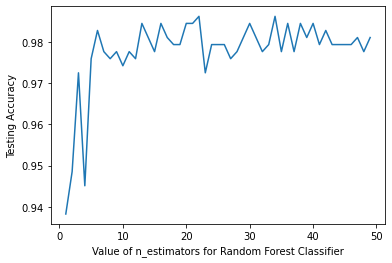

In [30]:
scores =[]
for k in [i for i in range(1, 50)]:
    clf = RandomForestClassifier(n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_test))

# plot the relationship between K and testing accuracy
plt.plot([i for i in range(1, 50)], scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


## 4.13 k-NN model <a id=4.13_knn_model><a/>      

## 4.13.1 First model <a id=4.13.1_first_model><a/>     

We explore the KNN algorithm next. We set the number of neighbors to 10 for our first model. We will also try out the model with different number of neighbors and compare the results. 

In [31]:
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape

(1941, 100)

In [32]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_test= knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print('test_score:', metrics.accuracy_score(y_train,y_pred_train))
print('train_score:', metrics.accuracy_score(y_test,y_pred_test))


test_score: 0.9528718703976435
train_score: 0.9451114922813036


We get approx. 0.95 accuracy score in our first KNN model with 10 neighbors. This result is worse than any random forest model we have so far. We will work on improving the performance.  

## 4.13.2 Hyperparameter search using GridSearchCV <a id=4.13.2_hyperparameter_search_using_GridSearchCV><a/>     

In [33]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,50))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knn_grid_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=knn_grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:   18.1s finished


In [34]:
print(grid_search.best_params_)

{'n_neighbors': 45}


In [35]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.02%


We get 96.02% as the best accuracy score in our grid search. This result is better than our first k-NN model accuracy score. We also observe that the number of neighbors must be 45 among the values we tried. This is consistent with the relationship between the error and the number of neighbors shown below.

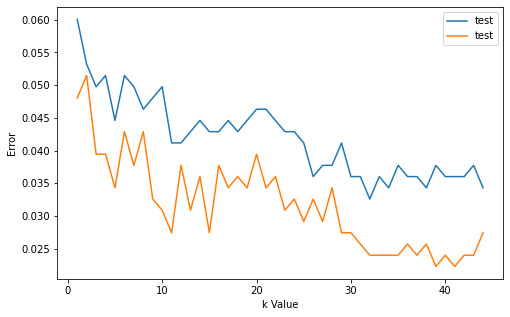

In [37]:
error1= []
error2= []
for k in range(1,45):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_train= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred_train))
    y_pred_test= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred_test))
plt.subplots(figsize=(8, 5))
#plt.plot(range(1,30),error1,label="train")
plt.plot(range(1,45),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

## 4.14 Final model selection<a id='4.14_final_model_selection'></a>

Time to select your final model to use for further business modeling! It would be good to revisit the above model selection; there is undoubtedly more that could be done to explore possible hyperparameters.
It would also be worthwhile to investigate removing the least useful features. Gathering or calculating, and storing, features adds business cost and dependencies, so if features genuinely are not needed they should be removed.
Building a simpler model with fewer features can also have the advantage of being easier to sell (and/or explain) to stakeholders.
Certainly there seem to be four strong features here and so a model using only those would probably work well.
However, you want to explore some different scenarios where other features vary so keep the fuller 
model for now. 
The business is waiting for this model and you have something that you have confidence in to be much better than guessing with the average price.

Or, rather, you have two "somethings". You built a best linear model and a best random forest model. You need to finally choose between them. You can calculate the mean absolute error using cross-validation. Although `cross-validate` defaults to the $R^2$ [metric for scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) regression, you can specify the mean absolute error as an alternative via
the `scoring` parameter.

## 4.14.1 Random forest classification model performance <a id='4.14.1_random_forest_model_performance'></a>

In [38]:
rf_cv_accuracy = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='accuracy', cv=5, n_jobs=-1)

In [39]:
rf_cv_accuracy = np.mean(rf_cv_accuracy['test_score'])
rf_cv_accuracy

0.9801226394616889

### 4.14.2 k-NN model performance<a id='4.14.2_knn_model_performance'></a>

In [40]:
knn_cv_accuracy = cross_validate(knn_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='accuracy', cv=5, n_jobs=-1)

In [41]:
knn_cv_accuracy=np.mean(knn_cv_accuracy['test_score'])
knn_cv_accuracy

0.9609670067288908

### 4.14.3 Conclusion<a id='4.14.3_conclusion'></a>

The random forest model has a higher cross-validation test score compare to k-NN model by almost 2%. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

This shows that you seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.15 Save best model object from pipeline<a id='4.15_save_best_model_object_from_pipeline'></a>

In [43]:
# set the best model
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X.columns]
best_model.build_datetime = datetime.datetime.now()

In [44]:
# save the model
modelpath = '../Outputs'
save_file(best_model, 'best_model.pkl', modelpath)

Writing file.  "../Outputs/best_model.pkl"
